In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from DrawtexDataset import DrawtexDataset
from DrawtexModel import DrawtexModel
from skimage import morphology

In [7]:
model: DrawtexModel = torch.load("DrawtexModel.pth")
model.eval()

ds: DrawtexDataset = DrawtexDataset(transforms.ToTensor())

dl = DataLoader(
    dataset=ds,
    batch_size=1,
    shuffle=True,
    num_workers=1
)


1


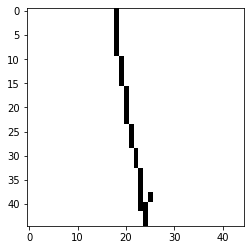

In [19]:
iter = enumerate(dl)
idx, (img, label) = next(iter)

classes: list[str] = ['!', '(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'alpha', 'b', 'beta', 'C', 'cos', 'd', 'Delta', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'G', 'gamma', 'geq', 'gt', 'H', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'leq', 'lim', 'log', 'lt', 'M', 'mu', 'N', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'q', 'R', 'rightarrow', 'S', 'sigma', 'sin', 'sqrt', 'sum', 'T', 'tan', 'theta', 'times', 'u', 'v', 'w', 'X', 'y', 'z', '[', ']', '{', '}']

out: torch.Tensor = model(img)
plt.imshow(img[0][0], cmap="gray")
_, pred = torch.max(out, 1)

print(classes[pred])


4


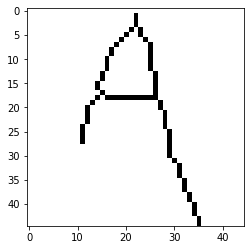

In [25]:
img = cv2.imread("../data/HASYv2/hasy-data/v2-00005.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.threshold(img, 128, 1, cv2.THRESH_BINARY)[1]
img = cv2.resize(img, (45, 45))
# Convert image shape to have 1 channel (standard image format)
img = img.reshape(45, 45, 1)
img ^= 1
img = morphology.skeletonize(img)
img ^= 1
ts = transforms.ToTensor()
img: torch.Tensor = ts(img)
img = img.unsqueeze(0)

out = model(img)
_, pred = torch.max(out, 1)
print(classes[pred])
plt.imshow(img[0][0], cmap="gray")